### Set-up the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme()

In [3]:
df=pd.read_csv("drive/MyDrive/Unif/bank-additional-full.csv", na_values=["unknown\"\""])
df1 = df.replace('"','',regex=True)
df1.rename(columns = lambda x: x[0:-2], inplace = True)
df1 = df1.rename(columns={"index,\"a":"age","y\"":"accepted"})
df1["age"] = pd.to_numeric(df1["age"].str.split(",").str[1],errors="coerce")
df1["accepted"] = df1["accepted"] == "yes\r"
df1["month"] = df1["month"].astype("category").cat.set_categories(['jan', 'fev', 'mar', 'apr', 'may', 'jun',
                          'jul', 'aug', 'sep','oct', 'nov', 'dec'], ordered= True)
df2 = df1.copy()

###0 - Basic information

In [4]:
df2.shape

(41188, 21)

In [5]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [6]:
df2.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,False


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             40858 non-null  object  
 2   marital         41108 non-null  object  
 3   education       39457 non-null  object  
 4   default         32591 non-null  object  
 5   housing         40198 non-null  object  
 6   loan            40198 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [8]:
def understand_data():
  feature = df2.columns
  df_feature = list()
  for one_f in feature:
    if df2[str(one_f)].dtype != np.int64 :
      if df2[str(one_f)].dtype!=np.float64:
        serie = df2[str(one_f)].value_counts()
        df_feature.append({"Name":one_f,"Number_of_variable":len(serie),"Variable":[i for i in serie.index]})
  col_string = pd.DataFrame(df_feature)
  return col_string
understand_data()

,Name,Number_of_variable,Variable
0,job,11,"[admin., blue-collar, technician, services, ma..."
1,marital,3,"[married, single, divorced]"
2,education,7,"[university.degree, high.school, basic.9y, pro..."
3,default,2,"[no, yes]"
4,housing,2,"[yes, no]"
5,loan,2,"[no, yes]"
6,contact,2,"[cellular, telephone]"
7,month,12,"[may, jul, aug, jun, nov, apr, oct, sep, mar, ..."
8,day_of_week,5,"[thu, mon, wed, tue, fri]"
9,poutcome,3,"[nonexistent, failure, success]"


In [9]:
df2.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
accepted             0
dtype: int64

In [10]:
# df2 = df2.replace(["no","yes"],[0,1])
df2["accepted"]=df2["accepted"].apply(lambda x: 0 if x==False else 1)

In [11]:
df2['accepted'].value_counts()

0    36548
1     4640
Name: accepted, dtype: int64

<AxesSubplot:xlabel='accepted', ylabel='count'>

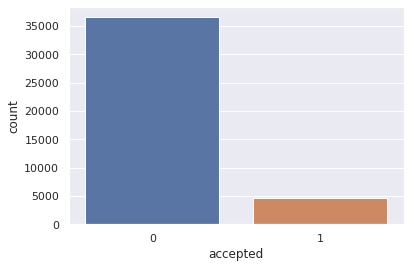

In [12]:
sns.countplot(x="accepted",data=df2)

<AxesSubplot:>

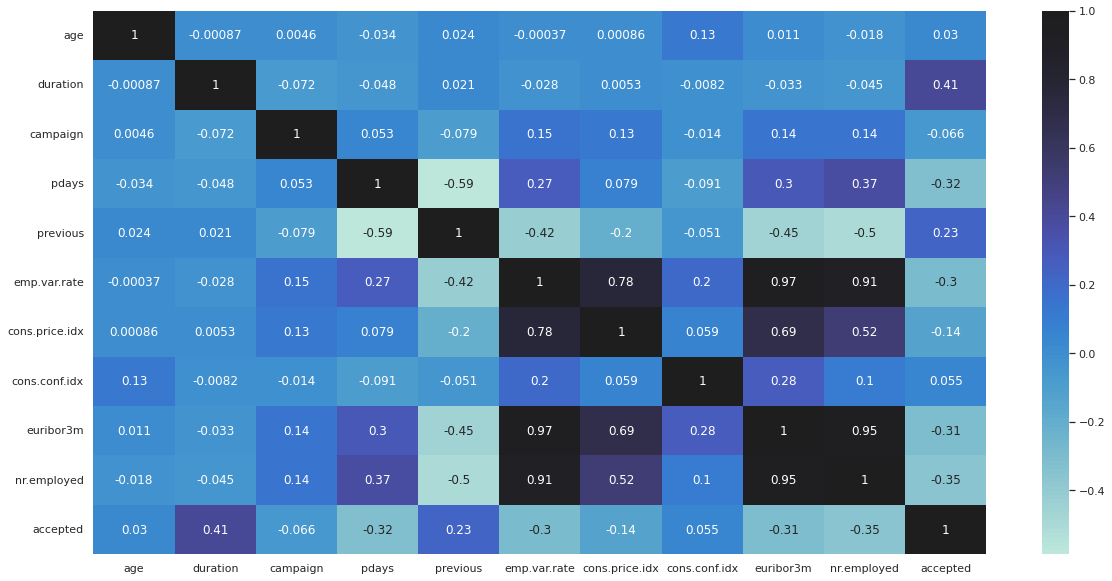

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),center=True,annot=True)

### @Useful function

In [145]:
def proba(feature,disp=True):  
  ratio_feature = pd.DataFrame((round(df2[feature].loc[df2["accepted"] == 1].value_counts()/df2[feature].value_counts(),3)).sort_values(ascending=True))
  ratio_df = pd.concat([pd.DataFrame(df2[feature].value_counts()),pd.DataFrame(df2[feature].loc[df2["accepted"]==1].value_counts()),ratio_feature],axis=1)
  ratio_df.columns = ["Total Value","Accepted","Proportion accepted"]
  ratio_df = ratio_df.sort_values("Proportion accepted",ascending=True)
  if disp==True:
    plt.figure(figsize=(10,6))
    sns.catplot(x="accepted", y=feature, data=df2, kind="bar", ci=None,orient='h')
    plt.xlabel("Acceptance rate")
    plt.title(f"Proportion of acceptance according to {feature}")
    plt.show()

  ratio_df
  return ratio_df

In [15]:
def show_graph(feature,box=False,count=False,reg=False):
  fig, ax = plt.subplots(figsize=(15,8))
  if box != False:
    sns.boxplot(data=df2,y=feature,x="accepted")
  if count != False:
    sns.countplot(data=df2, x=feature, hue="accepted", palette="rocket_r", alpha=.6)
  if reg != False:
    sns.regplot(x=feature, y="accepted", data=df2, logistic=True,ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [16]:
def show_hist(feature):
  fig, ax = plt.subplots(figsize=(10,5))
  sns.histplot(df2.loc[(df2["accepted"]==1),feature],color="green", stat='count', element="step", ax=ax,  alpha=0.2)
  sns.histplot(df2.loc[(df2["accepted"]==0),feature],color="red", stat='count', element="step", ax=ax,  alpha=0.2)
  plt.title(f"Distribution of the number of people having accepted/not having accepted according to {feature}")
  plt.legend(labels=["Accepted", "Not accepted"])


In [17]:
def show_hist_log(feature):
  fig, ax = plt.subplots(figsize=(10,5))
  sns.histplot((df2.loc[(df2["accepted"]==1),feature]).replace(0,0.1),color="green", stat='count', element="step", ax=ax,  alpha=0.2, log_scale=True)
  sns.histplot((df2.loc[(df2["accepted"]==0),feature]).replace(0,0.1),color="red", stat='count', element="step", ax=ax,  alpha=0.2, log_scale=True)
  plt.title(f"Distribution of the number of people having accepted/not having accepted according to {feature} (log scale)")
  plt.legend(labels=["Accepted", "Not accepted"])

In [18]:
def display_category(variable1,variable2):
  extract_feature = lambda x: [i for i in df2[x].value_counts().index]
  values = extract_feature(variable1)
  fig, axs = plt.subplots(1, len(values), figsize=(20, 10))
  for i, one_value in enumerate(values):
    sns.boxplot(data=df2.loc[df2[variable1] == one_value], y=variable2, x="accepted", ax=axs[i])
    axs[i].set_title(one_value)
  plt.show()

def display_age(num,variable):
  values = {}
  n=0
  classe_age = int(100/num)
  for i in range(0,101,classe_age):
    if n != i:
      values[("age_" + str(i))] = df2.loc[df2["age"].between(n,i)]
      n=i

  fig, axs = plt.subplots(1, len(values), figsize=(20, 10))
  for i, value in enumerate(values.items()):
    sns.boxplot(data=value[1], y=variable, x="accepted", ax=axs[i])
    axs[i].set_title(value[0])
  plt.show()

In [19]:
def lineplot_rate(feature):
  rate = df2.groupby(feature)['accepted'].mean()
  plt.figure(figsize=(12, 6))
  sns.lineplot(x=rate.index, y=rate.values)
  plt.xlabel(f'{feature}')
  plt.ylabel('Accepted Rate')
  plt.title(f"Evolution of the acceptance rate according to {feature}")
  plt.show()

In [20]:
def show_reg(feature,log_lin):
  if log_lin=="log":
    sns.lmplot(data=df2,x=feature,y="accepted",logistic=True,ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
  else:
    sns.regplot(x=feature, y='accepted', data=df2)

###1 - What profiles ( age / job / marital status / etc.) are the most likely to respond positively ?

####Age

By looking at the correlation matrix, we see that there is no linear relationship between age and being accepted.

In [21]:
df2[["age","accepted"]].corr()

,age,accepted
age,1.000000,0.030399
accepted,0.030399,1.000000


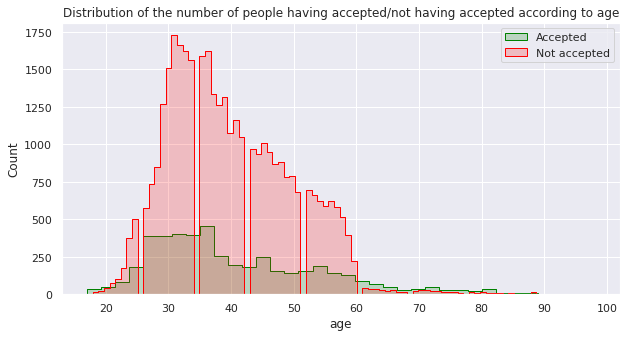

In [22]:
show_hist("age")

The distribution of the number of people who were accepted according to age also does not give us more information. Looking at the graph, it can be seen that there is no specific age category that is more likely to be accepted.

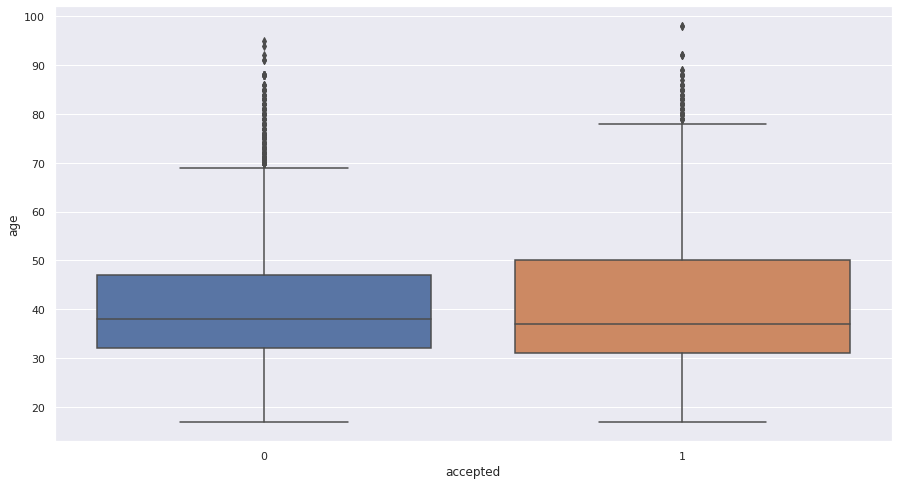

In [23]:
show_graph("age",1)

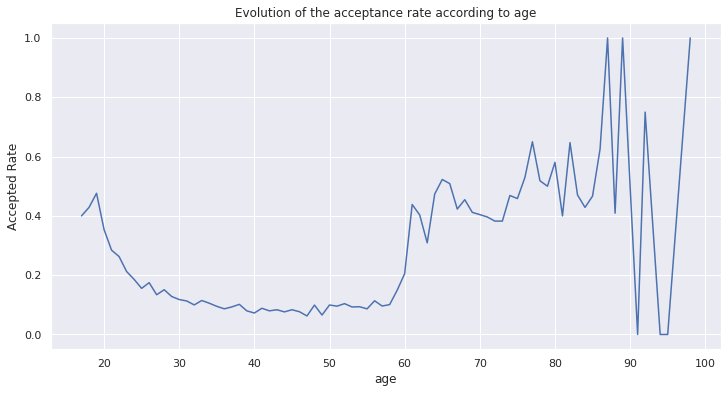

In [24]:
lineplot_rate('age')

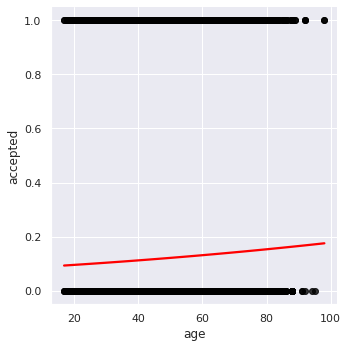

In [25]:
show_reg("age","log")

the age variable does not seem to have an influence on being accepted by the bank.

####Job

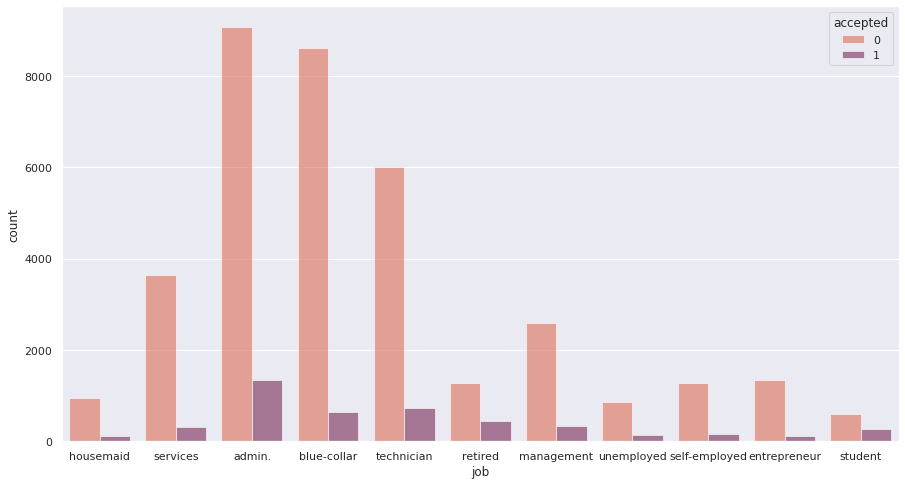

In [26]:
show_graph("job",count=1)

By analysing the graph of the number of people accepted, we can see that the jobs: admin, technician, blue-collar are those with the highest number of acceptances.

<Figure size 720x432 with 0 Axes>

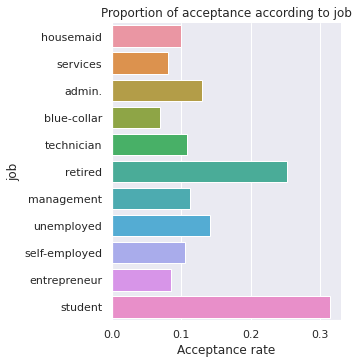

,Total Value,Accepted,Proportion accepted
blue-collar,9254,638,0.069
services,3969,323,0.081
entrepreneur,1456,124,0.085
housemaid,1060,106,0.100
self-employed,1421,149,0.105
technician,6743,730,0.108
management,2924,328,0.112
admin.,10422,1352,0.130
unemployed,1014,144,0.142
retired,1720,434,0.252


In [27]:
proba("job")

When calculating the acceptance rate, it can be seen that those who are most likely to accept are in fact students and retired people.

####Marital Status

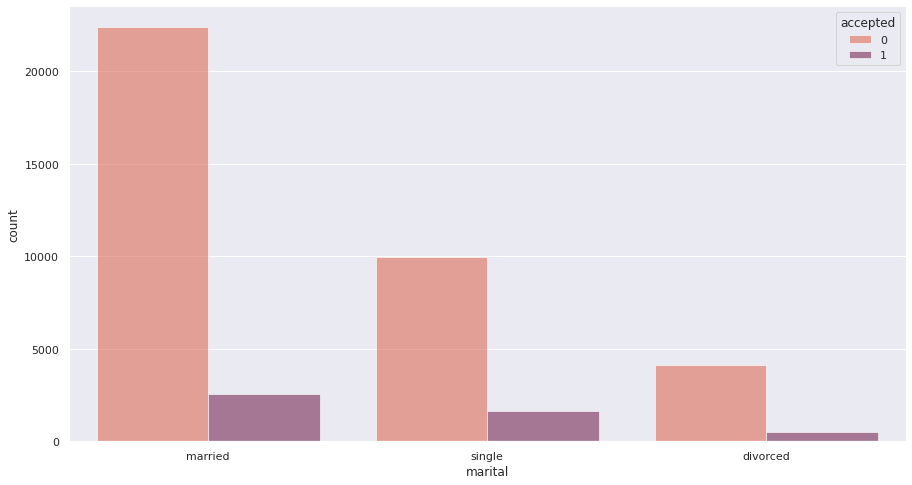

In [28]:
show_graph("marital",count=True)

If we analyse the number of people who accepted by marital status, we notice that married people are the most accepting.

<Figure size 720x432 with 0 Axes>

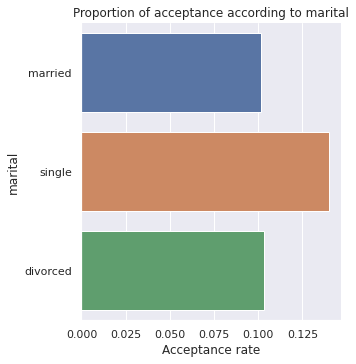

,Total Value,Accepted,Proportion accepted
married,24928,2532,0.102
divorced,4612,476,0.103
single,11568,1620,0.140


In [29]:
proba("marital")

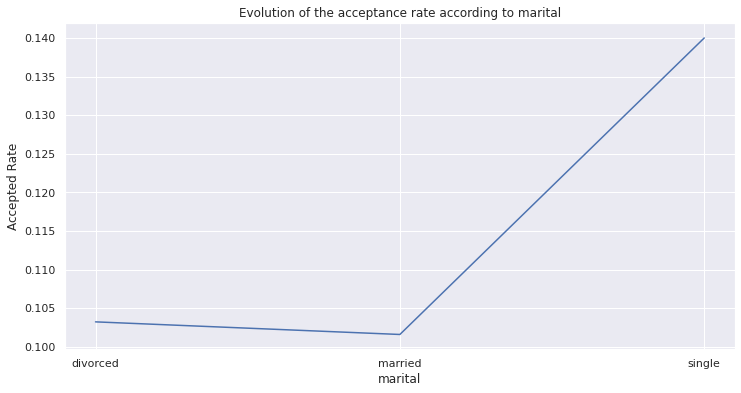

In [30]:
lineplot_rate("marital")

When calculating the acceptance ratio, we notice that those who are most likely to accept are single people.

####Education

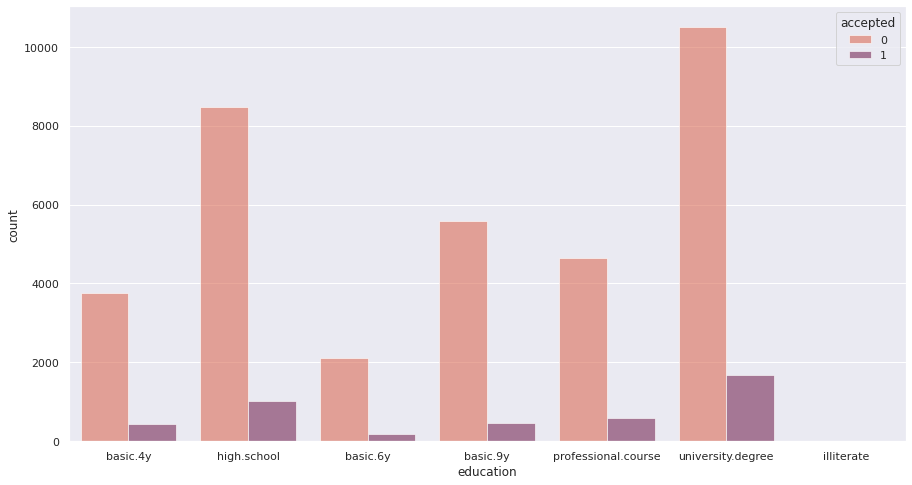

In [31]:
show_graph("education",count=True)

Based on the graph, the category of people who are most likely to be accepted are those with a long education, i.e. with a university degree, high school, etc.

<Figure size 720x432 with 0 Axes>

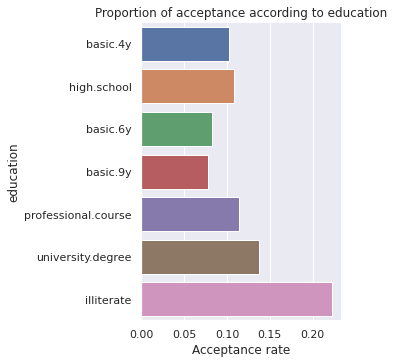

,Total Value,Accepted,Proportion accepted
basic.9y,6045,473,0.078
basic.6y,2292,188,0.082
basic.4y,4176,428,0.102
high.school,9515,1031,0.108
professional.course,5243,595,0.113
university.degree,12168,1670,0.137
illiterate,18,4,0.222


In [32]:
proba("education")

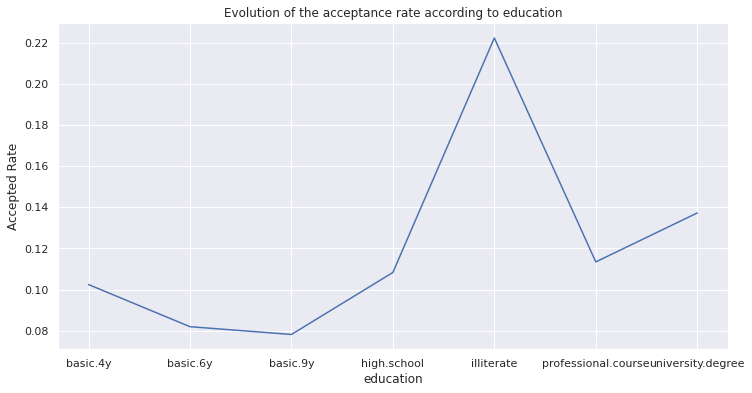

In [33]:
lineplot_rate("education")

Due to the low number of illiterate people, the acceptance ratio is higher, which should be ignored because it is not relevant.
Those who have been to university or taken vocational courses are the most likely to be accepted, the likelihood is the same between basic.6y and basic.9y.

###2 - Does the financial situation of people have an impact on how they answer ?


####Default

In [34]:
df2['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

<Figure size 720x432 with 0 Axes>

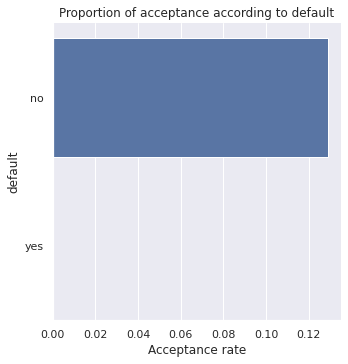

,Total Value,Accepted,Proportion accepted
no,32588,4197.0,0.129
yes,3,NaN,NaN


In [35]:
proba("default")

There is not enough data on who is missing and who is accepted to allow relevant conclusions to be drawn. In the dataframe, there are only people who have not been accepted and who have defaulted.

In [36]:
df2.loc[df2["default"]=="yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,accepted
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0


####Housing

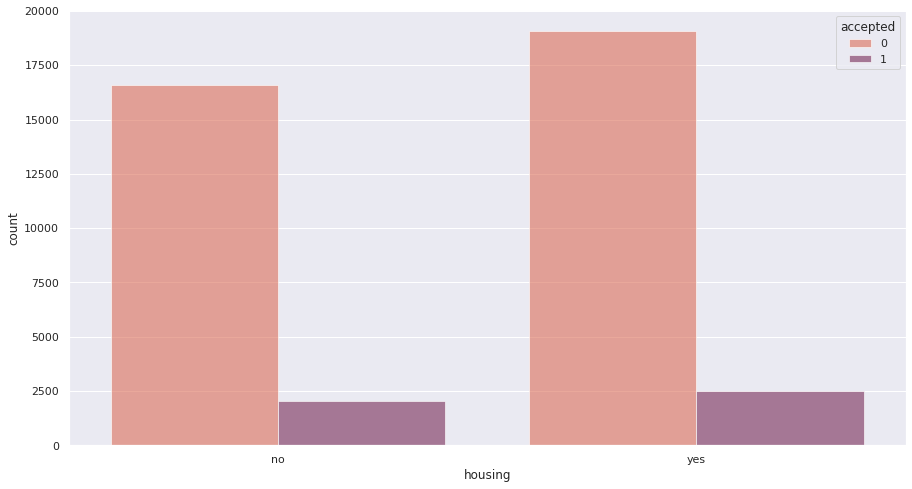

In [37]:
show_graph("housing",count=1)

The number of people who have an housing loan and are accepted is slightly higher than those who do not have accommodation and are also accepted.

<Figure size 720x432 with 0 Axes>

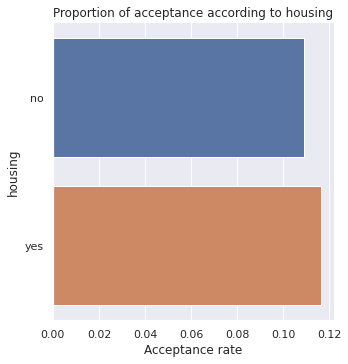

,Total Value,Accepted,Proportion accepted
no,18622,2026,0.109
yes,21576,2507,0.116


In [38]:
proba("housing")

The likelihood of being accepted if the person owns or does not own a house loan is quite similar.

####Loan

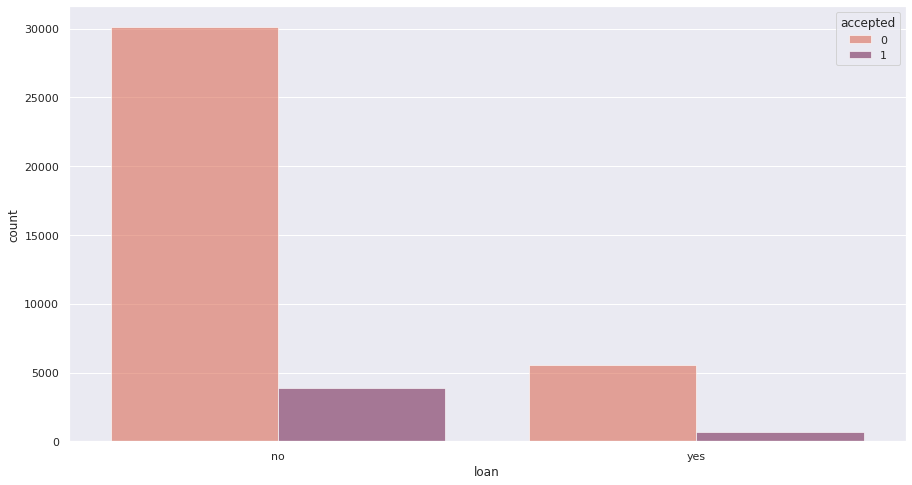

In [39]:
show_graph('loan',count=1)

After analysing the graph, it can be seen that the number of people who have a loan and are not accepted is higher than the number who do not have a loan. Moreover, the portion of people accepted with a loan is also higher. It is necessary to put the proportion back into proportion by calculating the propability of accepted people.

<Figure size 720x432 with 0 Axes>

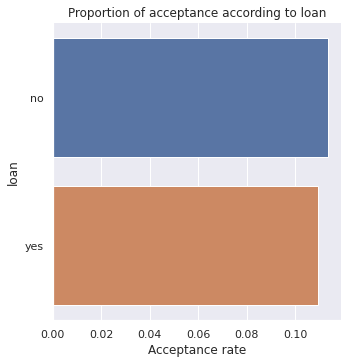

,Total Value,Accepted,Proportion accepted
yes,6248,683,0.109
no,33950,3850,0.113


In [40]:
proba("loan")

The likelihood of being accepted is about the same if you have a loan as if you do not.

### 3 - Do the timing (date / duration) and type of contact matter significantly ?
How ? Is it the same for all groups of people ?


####Month

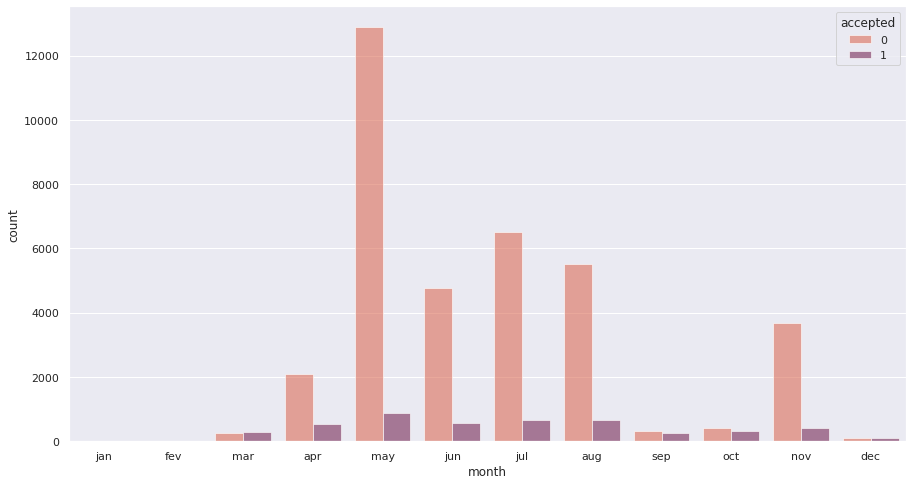

In [41]:
show_graph("month",count=True)

Between May and August, there is a large majority of accepted people, with a dominance for the month of May

<Figure size 720x432 with 0 Axes>

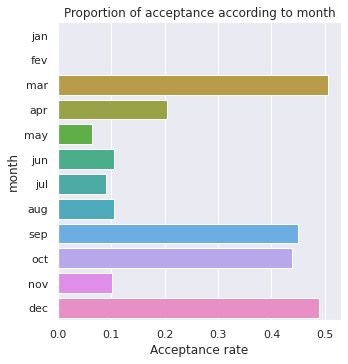

,Total Value,Accepted,Proportion accepted
may,13769,886,0.064
jul,7174,649,0.090
nov,4101,416,0.101
jun,5318,559,0.105
aug,6178,655,0.106
apr,2632,539,0.205
oct,718,315,0.439
sep,570,256,0.449
dec,182,89,0.489
mar,546,276,0.505


In [42]:
proba("month")

After analysing the acceptance ratio, it can be seen that March, September, October and December are the months with the highest probability of being accepted.

But compared to the other months, the number of people is significantly lower, which explains the higher acceptance ratio.

####Day of Week

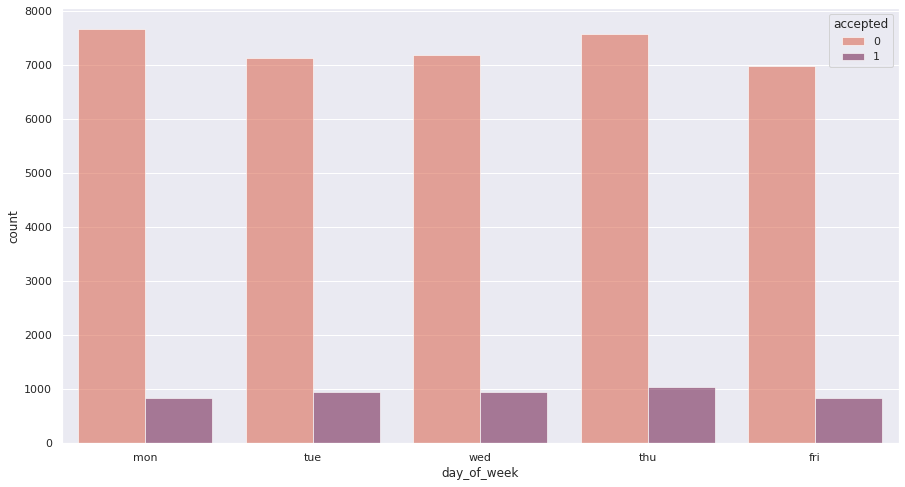

In [43]:
show_graph("day_of_week",count=1)

The days of the week are fairly consistent with each other in terms of who is accepted and not accepted. Thursday is the day with the most accepted persons.

<Figure size 720x432 with 0 Axes>

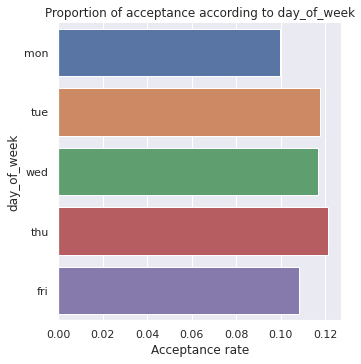

,Total Value,Accepted,Proportion accepted
mon,8514,847,0.099
fri,7827,846,0.108
wed,8134,949,0.117
tue,8090,953,0.118
thu,8623,1045,0.121


In [44]:
proba("day_of_week")

After calculating the acceptance ratio, we see that the days are fairly equivalent. To go into more detail, we can see that the best day to be accepted is Thursday.

####Duration

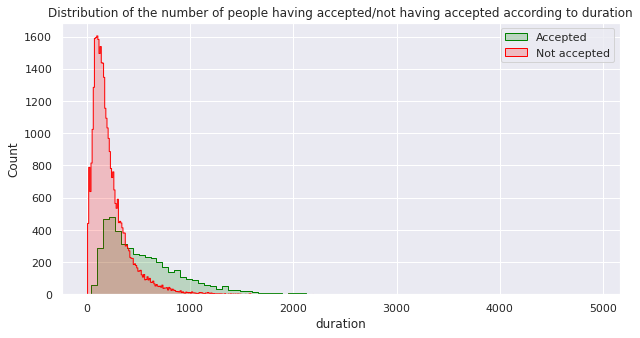

In [45]:
show_hist("duration")

As it can be seen that the graph is concentrated on the left side, and after analysis of the data contained in the Duration feature, a logarithmic graph is used.

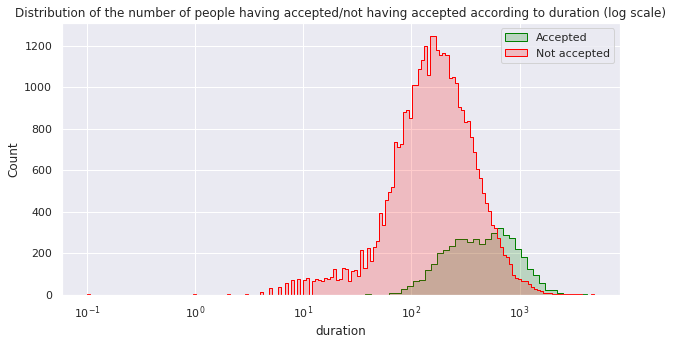

In [46]:
show_hist_log("duration")

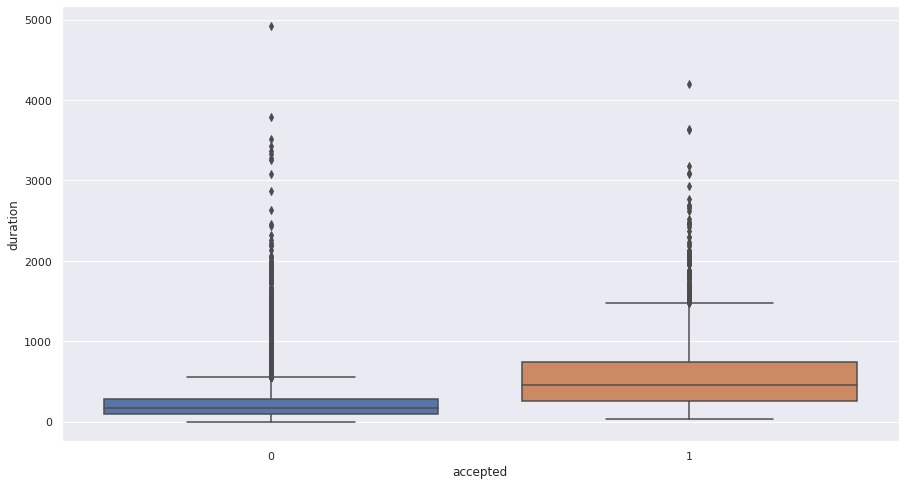

In [47]:
show_graph("duration",box=True)

Duration has a significant effect on whether or not you are accepted. Indeed, looking at the logarithmic graph we notice that the longer the duration, the more likely it is to be accepted. This conclusion is also drawn from the analysis with the box plot.

####Is it the same for all groups of people ?

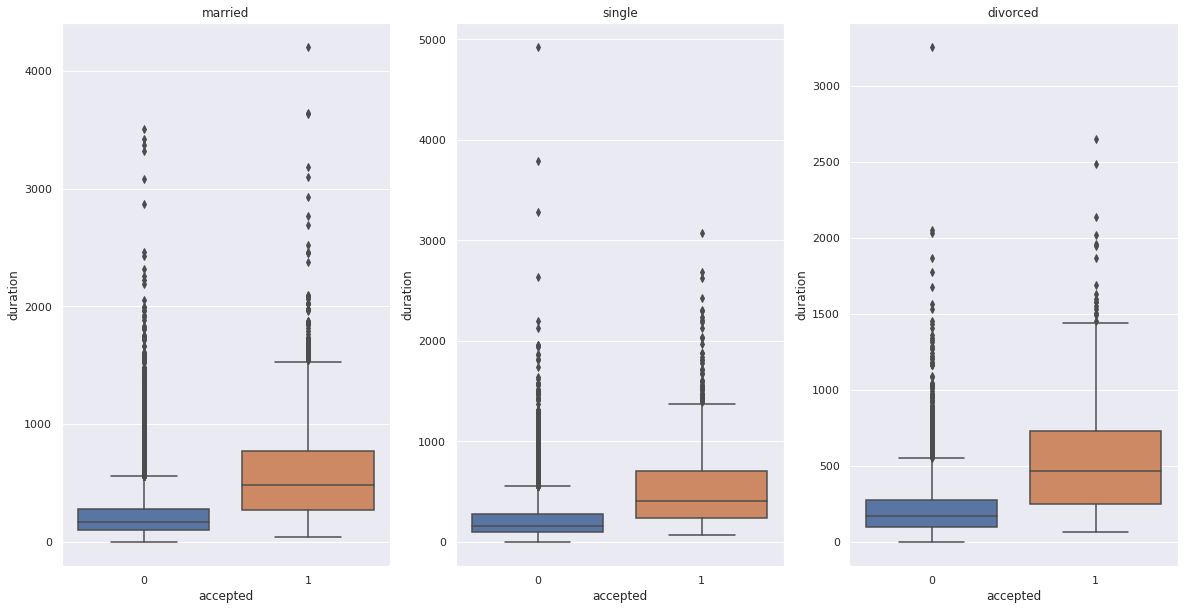

In [48]:
display_category("marital","duration")

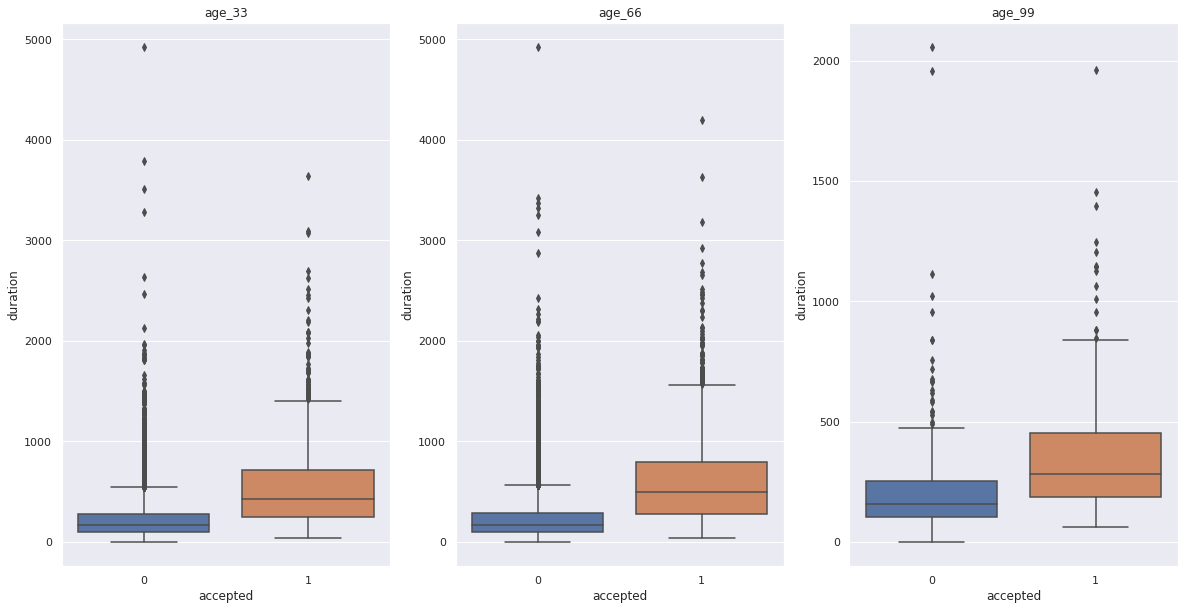

In [49]:
display_age(3,"duration")

It seems that the duration is the same effect for groups of people with different characteristics (with here, martial status or age (for age groups of 33 years (0 to 33, 33 to 66, 66 to 99))

### 4 - What is the best number of contacts to reach agreement ? What is the best delay ? Are people more likely to agree to the campaign if they have already agreed in the past ?


####4.1. What is the best number of contacts to reach agreement ?

####Campaign

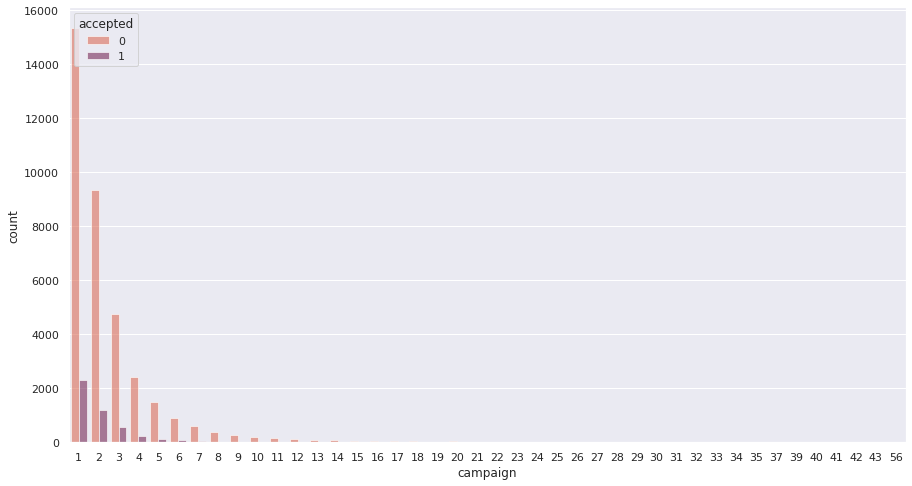

In [50]:
show_graph("campaign",count=1)

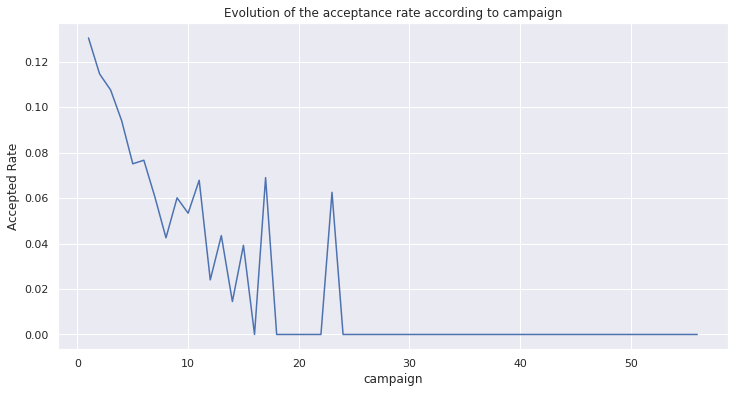

In [51]:
lineplot_rate("campaign")

,Total Value,Accepted,Proportion accepted
13,54,1.0,0.019
14,48,1.0,0.021
12,89,2.0,0.022
8,283,15.0,0.053
10,164,10.0,0.061
7,440,30.0,0.068
23,14,1.0,0.071
9,195,14.0,0.072
6,696,53.0,0.076
11,124,10.0,0.081


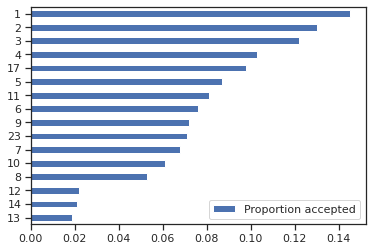

In [146]:
campaign_pr = proba("campaign",False)
campaign_pr = campaign_pr.dropna()
campaign_pr.plot(y="Proportion accepted",use_index=True, kind='barh')
campaign_pr

When viewing the graph, it can be seen that the probability of being accepted increases if the number of contacts that took place during the campaign decreases.

**The best number of contacts to reach an agreement is 1.**

####Previous

In addition to the campaign characteristic, we have previous which refers to the number of contacts that took place before the campaign. This should also be analysed to see what is the best way to get a agreement.

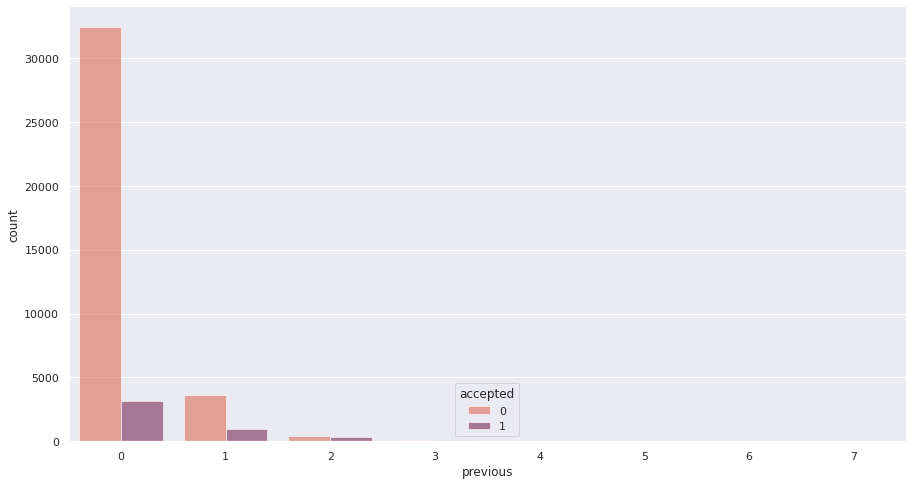

In [53]:
show_graph("previous",count=1)

<Figure size 720x432 with 0 Axes>

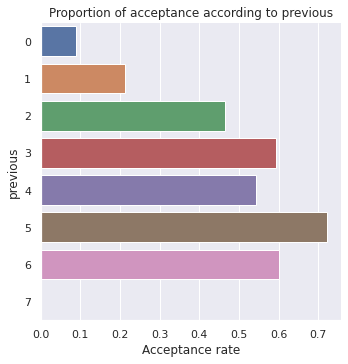

,Total Value,Accepted,Proportion accepted
0,35563,3141.0,0.088
1,4561,967.0,0.212
2,754,350.0,0.464
4,70,38.0,0.543
3,216,128.0,0.593
6,5,3.0,0.600
5,18,13.0,0.722
7,1,NaN,NaN


In [54]:
proba("previous")

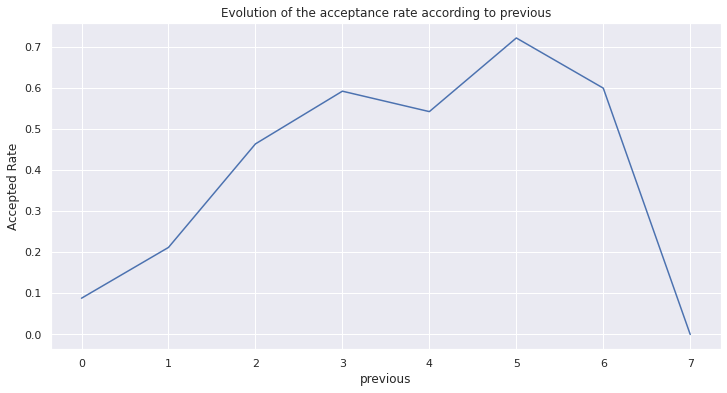

In [55]:
lineplot_rate("previous")

It can be seen that the more the person has been contacted, the greater the chance that they will accept. The maximum number of contacts being 5, after that the ratio decreases if we continue to contact the person.

When analysing this ratio, one must be careful to note that the proportion of people who have been contacted (i.e. previous >0) is quite small compared to the proportion who have not been contacted in advance.

####4.2. What is the best delay?

####Pdays

<Figure size 720x432 with 0 Axes>

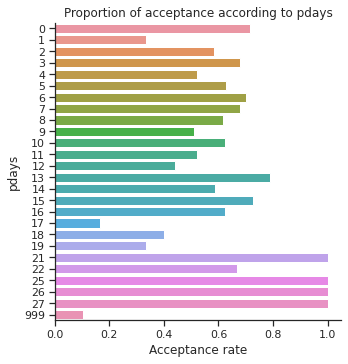

,Total Value,Accepted,Proportion accepted
999,29178,3020,0.104
17,6,1,0.167
1,21,7,0.333
19,3,1,0.333
18,5,2,0.400
12,50,22,0.440
9,53,27,0.509
11,25,13,0.520
4,102,53,0.520
2,53,31,0.585


In [147]:
proba("pdays")

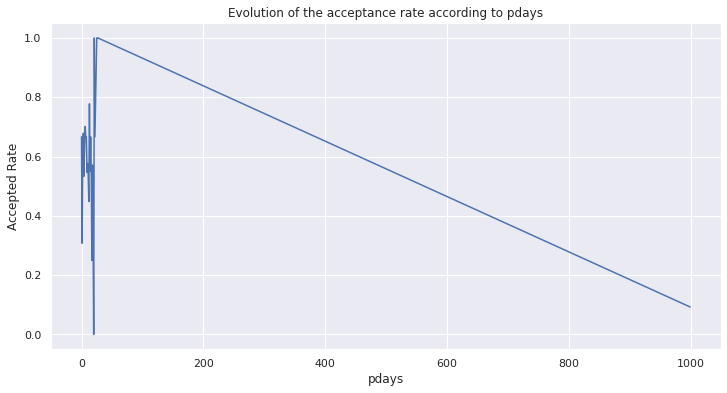

In [57]:
lineplot_rate("pdays")

As the value of the characteristic varies greatly, and after analysing the graph, no conclusions can be drawn about the best delay.

####4.3. Are people more likely to agree to the campaign if they have already agreed in the past ?

####Poutcome

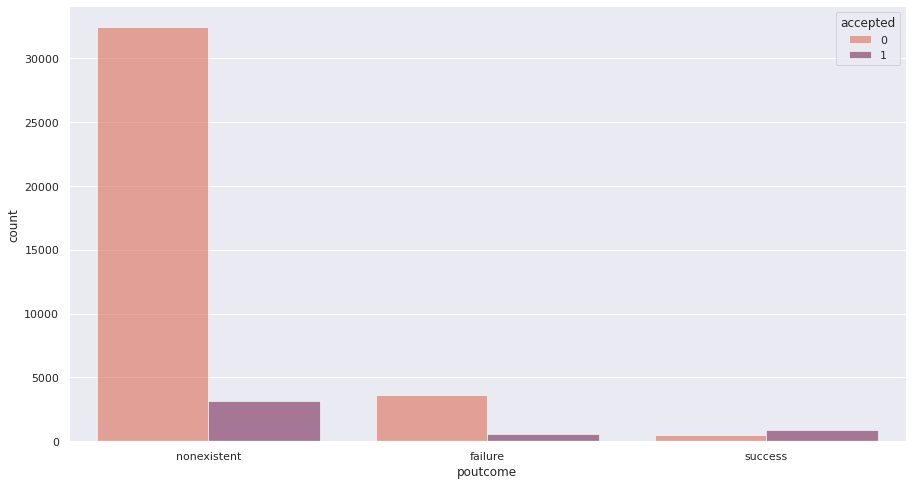

In [58]:
show_graph("poutcome",count=1)

<Figure size 720x432 with 0 Axes>

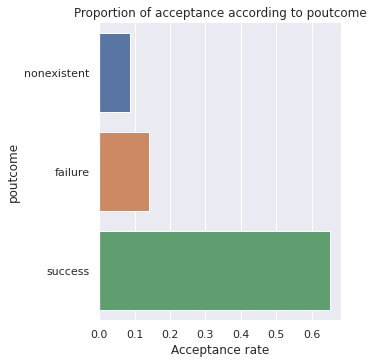

,Total Value,Accepted,Proportion accepted
nonexistent,35563,3141,0.088
failure,4252,605,0.142
success,1373,894,0.651


In [59]:
proba("poutcome")

If the last marketing campaign was successful and people accepted, the likelihood of them accepting again is greater.

### 5 - Does the economy (Employment variation rate / Consumer Price Index  / Consumer Confidence Index / Euribor / etc.) have an impact ? How ? Is it the same for everybody ?


####Employment variation rate (emp.var.rate)

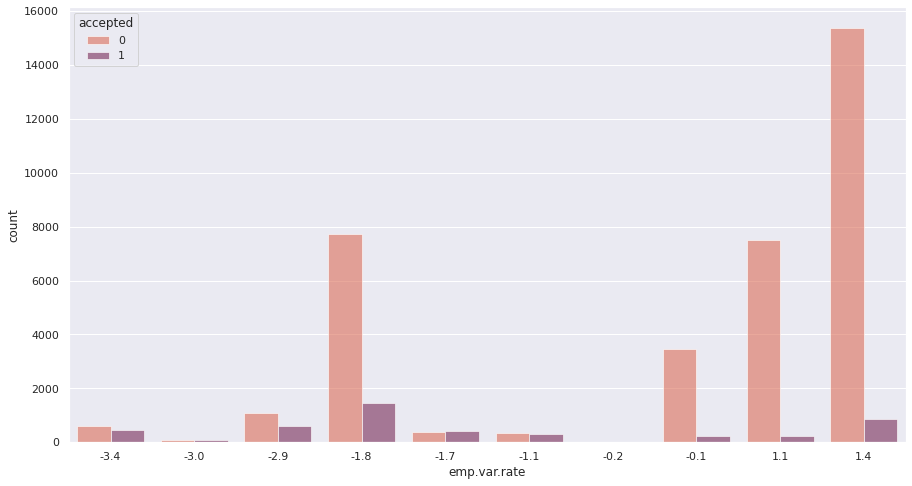

In [60]:
show_graph("emp.var.rate",count=1)

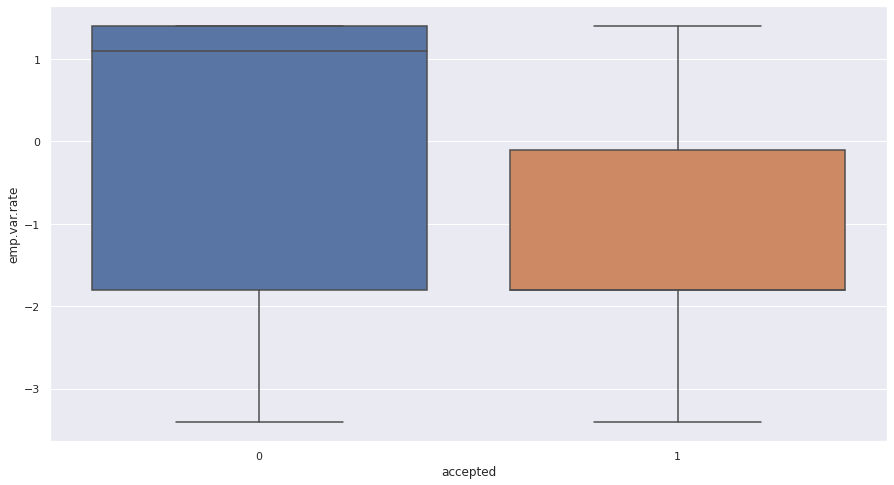

In [61]:
show_graph("emp.var.rate",box=1)

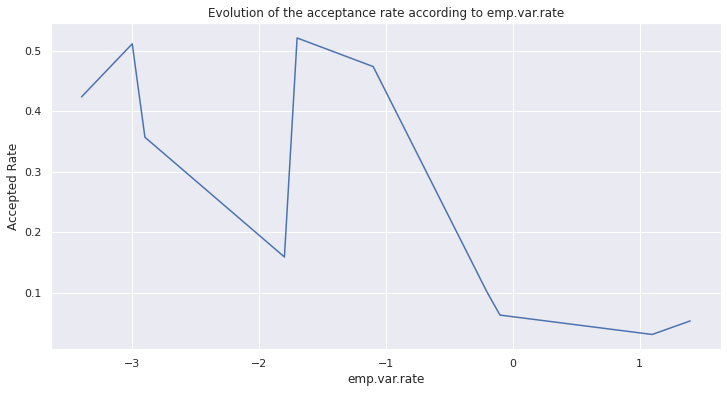

In [62]:
lineplot_rate("emp.var.rate")

when the rate of change in employment is negative, the probability of acceptance is much higher.

####Consumer Price Index (cons.price.idx)

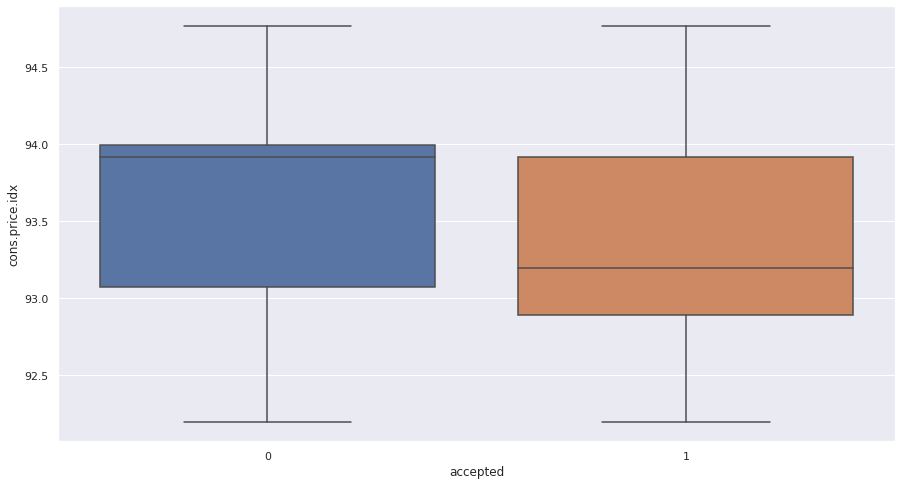

In [63]:
show_graph("cons.price.idx",box=1)

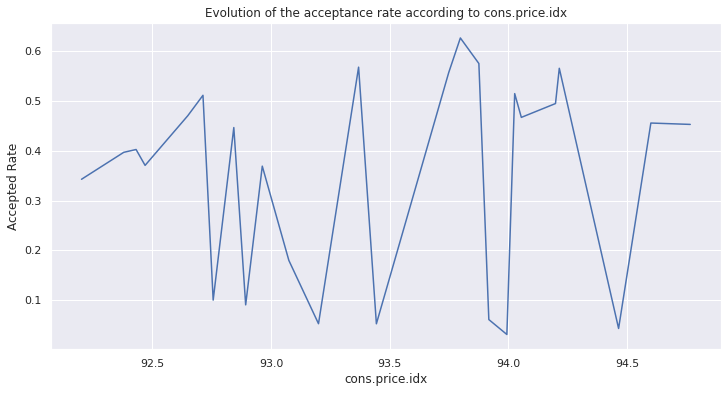

In [64]:
lineplot_rate("cons.price.idx")

It is rather hard to draw conclusions, we simply notice that the consumer price index varies with the acceptance rate.

####Consumer Confidence Index (cons.conf.idx)

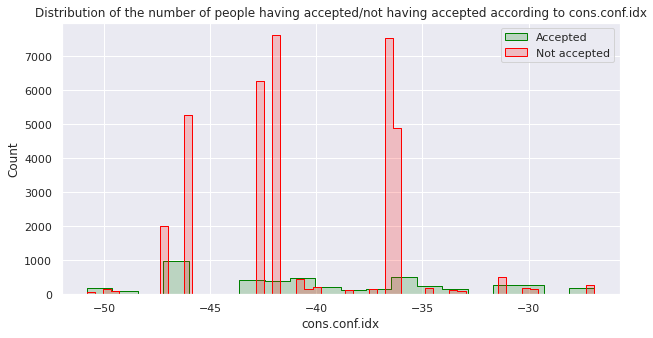

In [65]:
show_hist("cons.conf.idx")

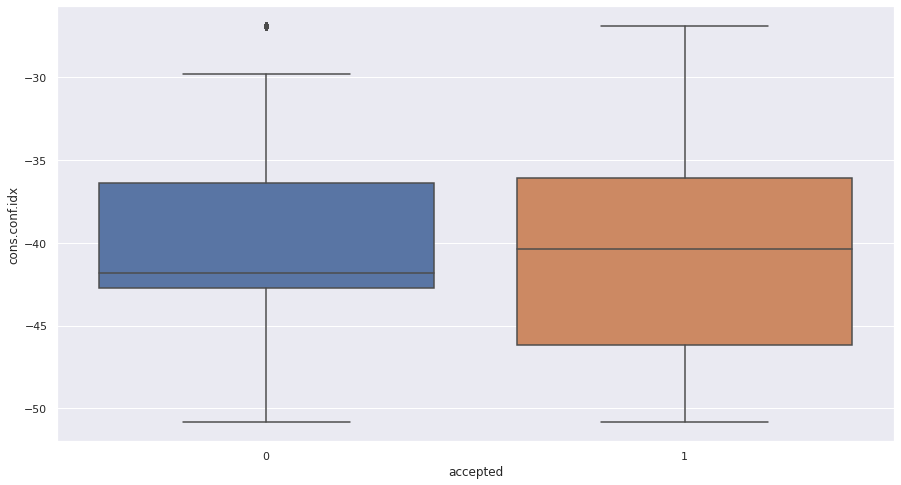

In [66]:
show_graph("cons.conf.idx",box=1)

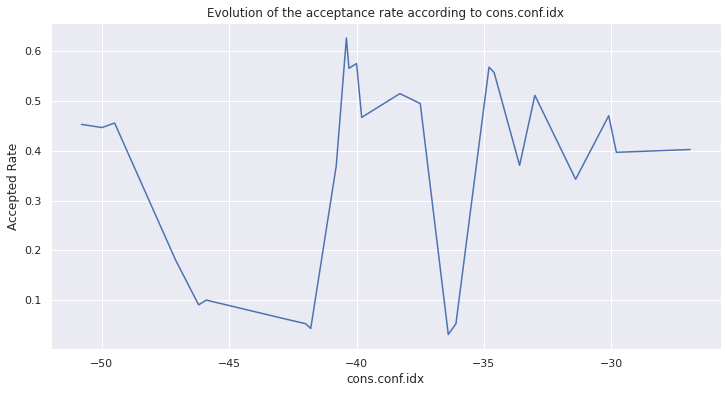

In [67]:
lineplot_rate("cons.conf.idx")

####Euribor (euribor3m)

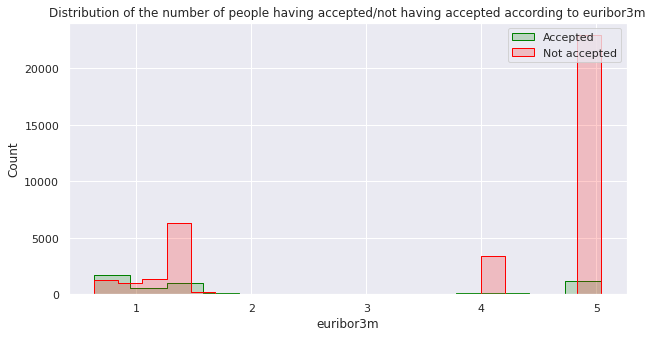

In [68]:
show_hist("euribor3m")

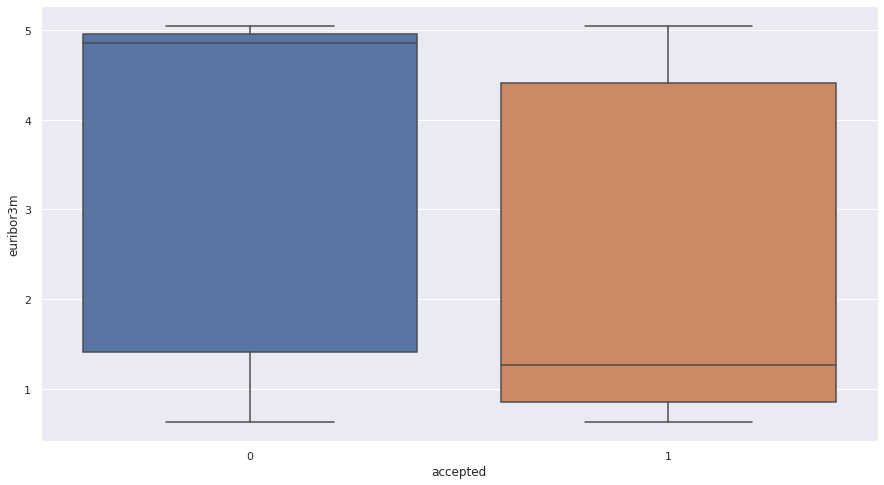

In [69]:
show_graph("euribor3m",box=1)

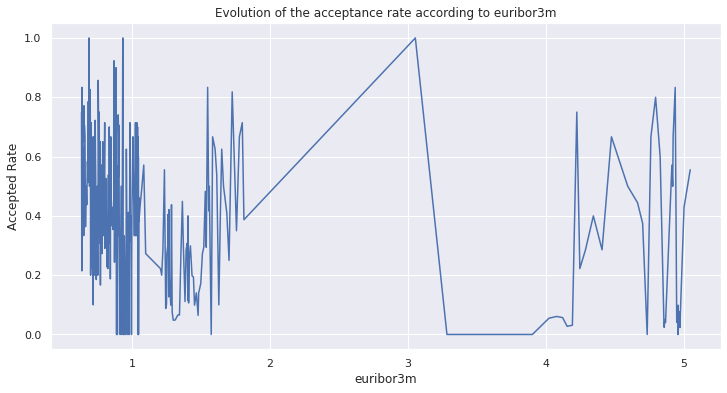

In [70]:
lineplot_rate("euribor3m")

####Number employed (nr.employed)

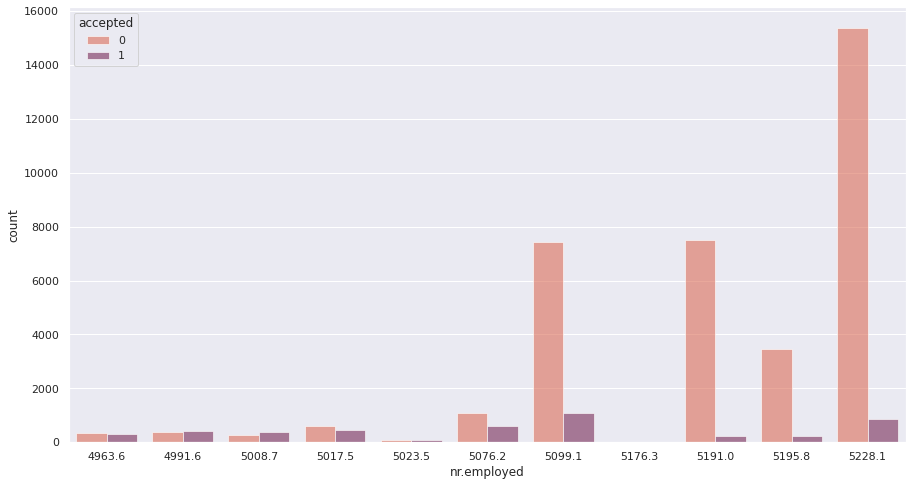

In [71]:
show_graph("nr.employed",count=1)

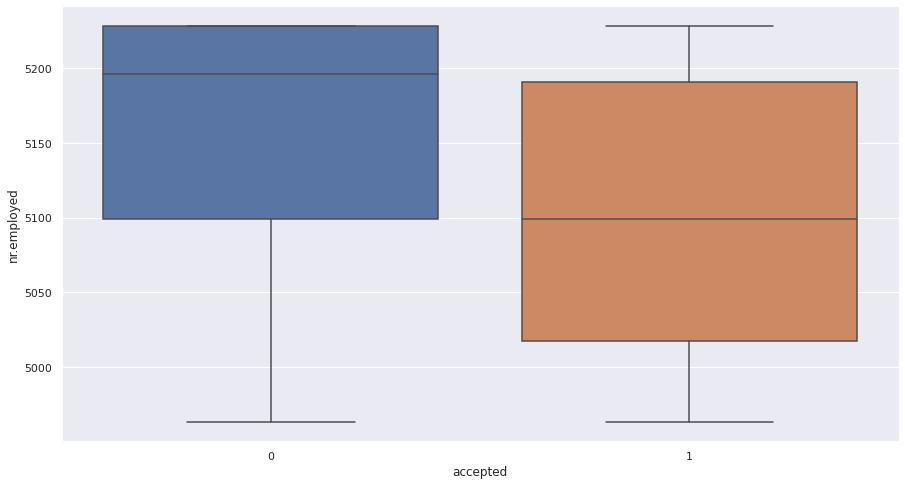

In [72]:
show_graph("nr.employed",box=1)

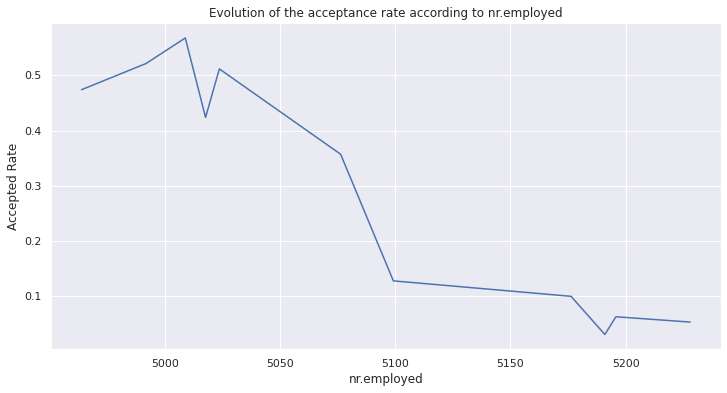

In [73]:
lineplot_rate("nr.employed")

####PCA

After analysing the economic data, it appears that it is rather complicated to draw conclusions from them by simple graphic visualisation. One method that can be used here is Principal Component Analysis (PCA), which allows new variables to be created on the basis of the information contained in the old ones.By information we mean the variation present in the sample, measured by the correlations between the original variables. 
The new variables, called principal components (or Eigenvectors, are uncorrelated, and are ordered by the fraction of the total information they capture.

In [74]:
subset = df2[["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","accepted"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset)
pca = PCA()
pca.fit(scaled_data)

PCA()

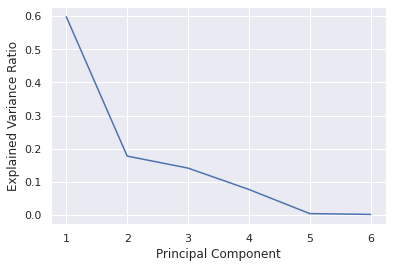

In [75]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

The graph is useful in determining the optimal number of principal components to use in the analysis. In this case, the graph shows that the first principal component explain a large proportion of the variance in the data, while the subsequent principal components explain much less.

####Is it the same for everybody ?

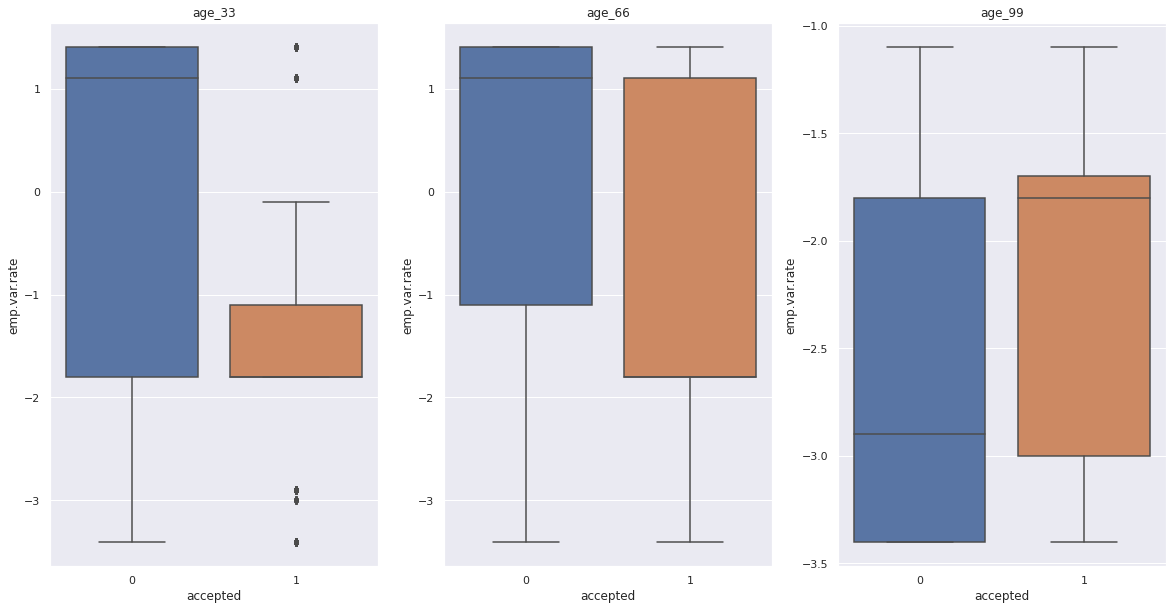

In [76]:
display_age(3,"emp.var.rate")

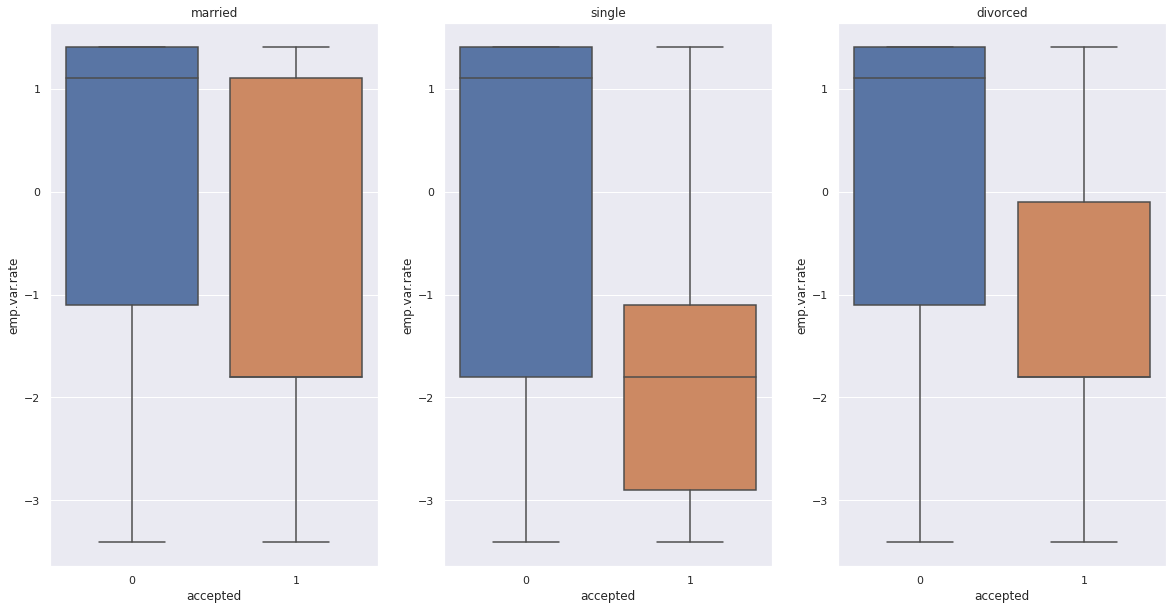

In [77]:
display_category("marital","emp.var.rate")

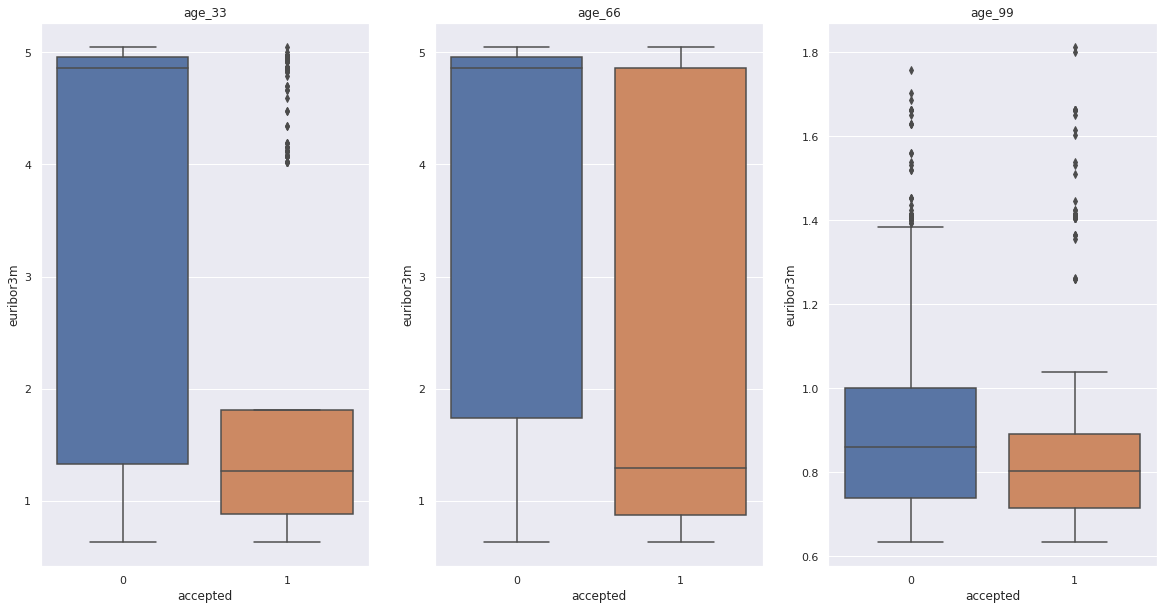

In [78]:
display_age(3,"euribor3m")

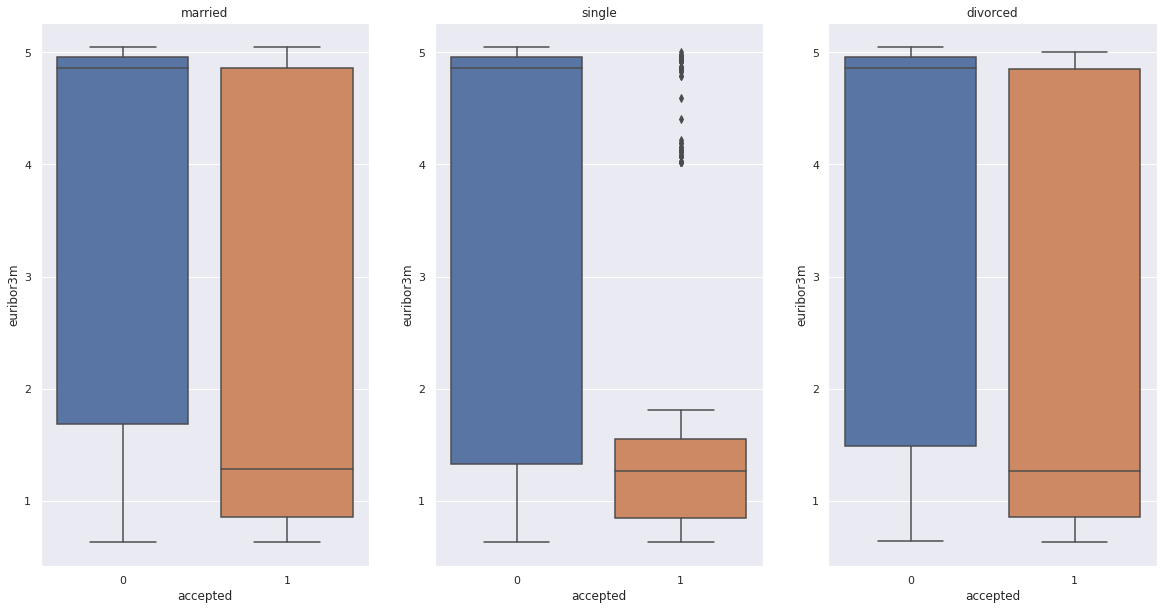

In [79]:
display_category("marital","euribor3m")

The personal situation of the person will also be influenced by economic factors which will have an impact on whether or not they accept. As we can see, depending on age, or marital status, this can have a different impact.

### 6 - Any interesting insights to add ?

We can try to build a model that predicts whether a person will accept or not based on the data we have.

In [124]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, classification_report, make_scorer, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE,BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score
from numpy.ma.core import logical_and
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.svm import LinearSVC   
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold as Sf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score, recall_score, roc_auc_score,precision_score

####Data Preparation

In [81]:
df2 = df2.replace(["no","yes"],[0,1])
df2 = df2.dropna()

In [82]:
def categorical_value(df):
  cat = []
  for i in df.columns.tolist():
    if type(df[i][0]) == str:
      cat.append(i)
    continue
  return cat

In [83]:
categorical_variables = categorical_value(df2)
categorical_variables

['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

In [84]:
def data_seg(df):
  subset_cat = pd.get_dummies(df[categorical_value(df2)]) 
  X=pd.concat([subset_cat,df.drop(columns=categorical_variables)], axis = 1)
  X=X.drop(['accepted'],axis=1)
  y=df["accepted"]
  x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=42)
  return x_train,x_test,y_train,y_test


####Score function

In [142]:
def conf_matrix(true,preds):
  """true = y_test (test set)
    preds = y_preds  (prediction on our test set)"""
  tn, fp, fn, tp = confusion_matrix(true, preds).ravel()
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  print("true negatif : {a}, true positif : {b}, false negatif : {c}, false positif : {d}".format(a=tn,b=tp,c=fn,d=fp))
  print("recall is:", recall)
  print("precision is", precision)
  return (tn, fp, fn, tp)

def cm_show(true,preds):
  cm = confusion_matrix(true,preds)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title("Confusion Matrix")
  plt.xlabel('Predicted Class')
  plt.ylabel('True Class')
  plt.show()
  print()
  tn, fp, fn, tp = confusion_matrix(true, preds).ravel()
  print("---------------------------------------------------")
  report = classification_report(true,preds)
  print()
  print(report)
  print()
  print("----------------------------------------------------")
  # print()
  # print("recall is:", tp / (tp + fn))
  # print("precision is", tp / (tp + fp))

In [86]:
def do_cross_validation(model,x_train,y_train):
  """take 3 arguments :  model --> knn,rf,dt,..
  x_train --> value on our train set
  y_train --> target on our train set
  """
  accuracy = make_scorer(accuracy_score)
  kappa = make_scorer(cohen_kappa_score)
  results = cross_validate(model, x_train, y_train, cv=5, scoring={'accuracy': accuracy, 'cohen_kappa': kappa})
  scores = cross_val_score(model, x_train, y_train, cv=5)
  variance = np.var(scores)
  print("CROSS VALIDATION :")
  print(f"My test scores on accuracy are: \n {[round(res,3) for res in results['test_accuracy']]} \n and my test scores on cohen kappa are: \n {[round(res,3) for res in results['test_cohen_kappa']]}")
  print(f"My average test accuracy is: {round(np.mean(results['test_accuracy']),3)} with a standard deviation of {round(np.std(results['test_accuracy']),3)} \n and my average test cohen kappa is: {round(np.mean(results['test_cohen_kappa']),3)} with a standard deviation of {round(np.std(results['test_cohen_kappa']),3)}")
  print(f"My variance is:", variance)
  print()
  return results

In [87]:
def plot_roc_curve(model, x_test, y_test):
    predictions = model.predict_proba(x_test)
    prob_pos = [i[1] for i in predictions]
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, prob_pos)  
    auc = roc_auc_score(y_test, prob_pos)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_pos_rate, true_pos_rate, 'b', label='AUC = %0.2f' % auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [108]:
scores_value = {"AUC":{},"MSE":{},"Precision":{},"Recall":{},"Cohen_Kappa":{},"Accuracy":{},"Variance":{}}

In [148]:
def final_metrics(model,x_train,x_test,y_train,y_test,name):
  sf = Sf(n_splits=5, random_state=42, shuffle=True)
  y_preds=model.predict(x_test)
  y_train_pred=model.predict(x_train)

  print()
  print(f"For {str(model)}")
  print()
  print("====================================================")
  print()
  cm_show(y_test,y_preds)
  print()
  print("====================================================")
  print()
  # result = do_cross_validation(model,x_train,y_train)
  # print()
  # print("====================================================")
  
  predictions_proba=model.predict_proba(x_test)
  prob_pos = [i[1] for i in predictions_proba]

  print()
  print('On the training set : ')
  print(f'Precision : {precision_score(y_train,y_train_pred)} ')
  print(f'Recall : {recall_score(y_train,y_train_pred)}')
  print(f'Accuracy : {accuracy_score(y_train,y_train_pred)}')
  print(f'F1 score : {f1_score(y_train, y_train_pred, average="micro")}')
  print()
  print()
  print('On the testing set : ')
  print(f'Precision : {precision_score(y_test,y_preds)}')
  print(f'Recall : {recall_score(y_test,y_preds)}')
  print(f'Accuracy :  {accuracy_score(y_test, y_preds)}')
  print(f'F1 score : {f1_score(y_test, y_preds, average="micro")} ')
  print()
  print("=======================================================")
  print()

  plot_roc_curve(model,x_test, y_test)
  print()
  print("========================================================")


  accuracy = make_scorer(accuracy_score)
  kappa = make_scorer(cohen_kappa_score)
  recall = make_scorer(recall_score,greater_is_better=True)
  precision=make_scorer(precision_score,greater_is_better=True)
  mse = metrics.make_scorer(metrics.mean_squared_error, greater_is_better=False)
  cr_validation = cross_validate(model,x_train,y_train,cv=sf,scoring={'precision': precision, 'mse': mse, 'accuracy': accuracy, 'cohen_kappa': kappa, 'recall':recall})
  scores = cross_val_score(model, x_train, y_train, cv=5)


  scores_value['MSE'].update({str(name) : round(np.mean(cr_validation['test_mse']),3)})
  scores_value['AUC'].update({str(name):roc_auc_score(y_test, prob_pos)})
  scores_value['Recall'].update({str(name):round(np.mean(cr_validation['test_recall']),3)})
  scores_value['Precision'].update({str(name):round(np.mean(cr_validation['test_precision']),3)})
  scores_value['Accuracy'].update({str(name):round(np.mean(cr_validation['test_accuracy']),3)})
  scores_value['Cohen_Kappa'].update({str(name):round(np.mean(cr_validation['test_cohen_kappa']),3)})
  scores_value['Variance'].update({str(name):np.var(scores)})



####Modelling

In [174]:
models = {
        "DT": {
            "model": DecisionTreeClassifier(),
            'params': {
                'criterion': ["entropy", "gini"],
                'max_depth': list(np.arange(5, 30, 5)),
                'ccp_alpha': [0.0, 0.02, 0.9, 0.3, 0.5],
                'min_samples_split': list(np.arange(20,50,10)),
                'min_samples_leaf' : list(np.arange(20,50,10)),
                'max_features' : ["auto", "sqrt", "log2", 0.7, 0.5, 0.3],
                'class_weight': ["balanced", None]}
        },
        "KNN": {
            "model": KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3,5,10,30,50,70,100,200,300],
                'weights': ["uniform", "distance"],
                'metric' : ['minkowski','euclidean','manhattan'], 
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                }
        },
        "RF": {
            "model": RandomForestClassifier(),
            "params": {
                'n_estimators': list(np.arange(1, 40, 1)),
                'max_depth': list(np.arange(8,30,2)),
                'min_samples_split' : [20,30,40,50,60],
                'min_samples_leaf' : [20,30,40,50,60],
                'criterion': ["entropy", "gini"],
                'max_features': ["auto", "sqrt", "log2", 0.7, 0.5, 0.3],
                'ccp_alpha': list(np.arange(0, 0.9, 0.02)),
                'class_weight': ["balanced", None]}
        },
        # 'LinearReg': {
        #     "model": Ridge(),
        #     "params":{
        #         'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        #         'fit_intercept': [True, False],
        #         'solver': ['sag', 'saga', 'lbfgs', 'newton-cg'],
        #         'max_iter': [1000, 5000, 10000],
        #         'tol': [1e-3, 1e-4, 1e-5]}
        # },
        
        'LogisticReg': {
            "model": LogisticRegression(),
            "params": {
                "penalty": ["l1", "l2", "elasticnet", None],
                'fit_intercept': [True, False],
                'C':[1e-4, 1e-3, 1e-2,1e-1,1, 10],
                'intercept_scaling': [0.1, 0.3, 0.5, 0.7, 1],
                "max_iter": [50, 100, 150, 200, 250, 300,500,1000,10000, 25000, 6000],
                "class_weight": ["balanced", None],
                "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
        },
          # 'SVM': {
          #   "model": SVC(),
          #   "params": {
          #       'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
          #       'tol': [1e-3, 1e-4, 1e-5],
          #       "max_iter": [50, 100, 150, 200, 250, 300],
          #       'C': list(np.arange(1, 10, 1)),
          #       'class_weight': ["balanced", None]}
          # }
}

In [90]:
x_train,x_test,y_train,y_test = data_seg(df2)

In [102]:
def do_model(x_train,x_test,y_train,y_test,params,model,name):
  precision=make_scorer(precision_score,greater_is_better=True)
  sf = Sf(n_splits=5, random_state=42, shuffle=True)
  m = model
  rs = RandomizedSearchCV(m, params, scoring=precision, cv=sf, refit=True, n_jobs=-1)
  rs.fit(x_train, y_train)
  best_param = rs.best_params_
  best_model = rs.best_estimator_
  print(best_param)
  #print(best_model)
  print()

  final_metrics(best_model, x_train, x_test, y_train, y_test,name)
  
  return (best_param,best_model)


####Evaluation

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'min_samples_split': 20, 'min_samples_leaf': 40, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.0}


For DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='auto', min_samples_leaf=40,
                       min_samples_split=20)




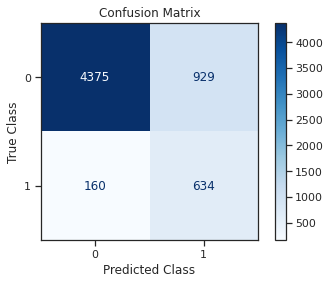


---------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      5304
           1       0.41      0.80      0.54       794

    accuracy                           0.82      6098
   macro avg       0.69      0.81      0.71      6098
weighted avg       0.89      0.82      0.84      6098


----------------------------------------------------



On the training set : 
Precision : 0.4076886568580921 
Recall : 0.8407830342577488
Accuracy : 0.8264862648626486
F1 score : 0.8264862648626486


On the testing set : 
Precision : 0.4056301983365323
Recall : 0.7984886649874056
Accuracy :  0.821416857986225
F1 score : 0.8214168579862251 




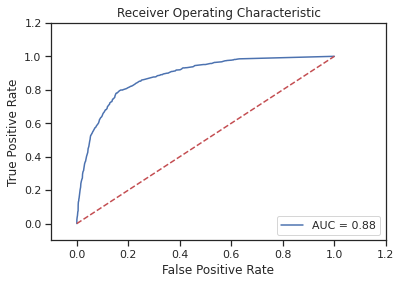

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.8

{'weights': 'uniform', 'n_neighbors': 300, 'metric': 'minkowski', 'algorithm': 'ball_tree'}


For KNeighborsClassifier(algorithm='ball_tree', n_neighbors=300)




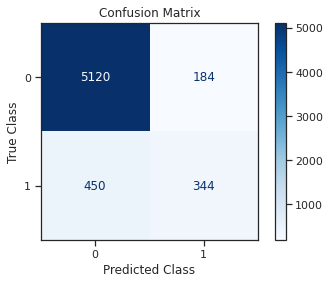


---------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5304
           1       0.65      0.43      0.52       794

    accuracy                           0.90      6098
   macro avg       0.79      0.70      0.73      6098
weighted avg       0.88      0.90      0.89      6098


----------------------------------------------------



On the training set : 
Precision : 0.656021897810219 
Recall : 0.46916802610114194
Accuracy : 0.9023780237802378
F1 score : 0.9023780237802378


On the testing set : 
Precision : 0.6515151515151515
Recall : 0.4332493702770781
Accuracy :  0.8960314857330273
F1 score : 0.8960314857330273 




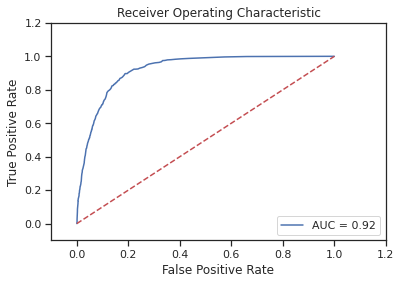


{'n_estimators': 16, 'min_samples_split': 50, 'min_samples_leaf': 30, 'max_features': 0.5, 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.18}


For RandomForestClassifier(ccp_alpha=0.18, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=0.5,
                       min_samples_leaf=30, min_samples_split=50,
                       n_estimators=16)




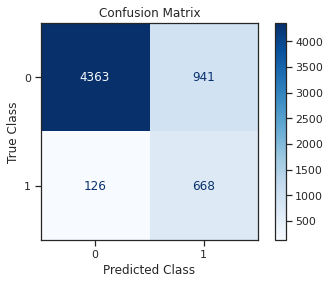


---------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5304
           1       0.42      0.84      0.56       794

    accuracy                           0.83      6098
   macro avg       0.69      0.83      0.72      6098
weighted avg       0.90      0.83      0.85      6098


----------------------------------------------------



On the training set : 
Precision : 0.4025157232704403 
Recall : 0.8561174551386623
Accuracy : 0.8222222222222222
F1 score : 0.8222222222222222


On the testing set : 
Precision : 0.4151646985705407
Recall : 0.8413098236775819
Accuracy :  0.8250245982289275
F1 score : 0.8250245982289274 




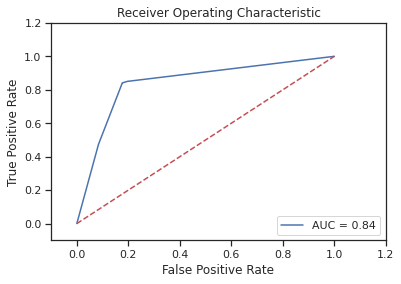

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver ne

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'intercept_scaling': 1, 'fit_intercept': False, 'class_weight': None, 'C': 0.0001}


For LogisticRegression(C=0.0001, fit_intercept=False, penalty='l1', solver='saga')




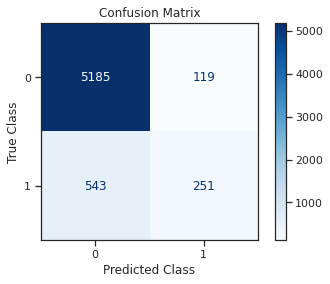


---------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5304
           1       0.68      0.32      0.43       794

    accuracy                           0.89      6098
   macro avg       0.79      0.65      0.69      6098
weighted avg       0.88      0.89      0.87      6098


----------------------------------------------------



On the training set : 
Precision : 0.6808510638297872 
Recall : 0.3236541598694943
Accuracy : 0.8959409594095941
F1 score : 0.8959409594095942


On the testing set : 
Precision : 0.6783783783783783
Recall : 0.3161209068010076
Accuracy :  0.891439816333224
F1 score : 0.891439816333224 




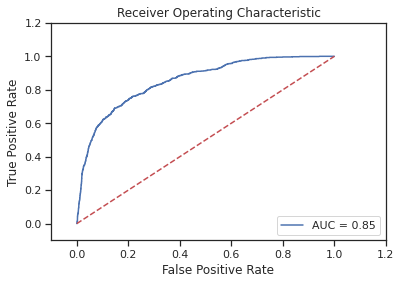

In [175]:
for model_name,values in models.items():
  do_model(x_train,x_test,y_train,y_test,values['params'],values['model'],model_name)

In [166]:
# do_model(x_train,x_test,y_train,y_test,{
#                 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                 'fit_intercept': [True, False],
#                 'solver': ['sag', 'saga', 'lbfgs', 'newton-cg'],
#                 'max_iter': [1000, 5000, 10000],
#                 'tol': [1e-3, 1e-4, 1e-5]},Ridge(),'LinearReg')

In [176]:
metric_df = pd.DataFrame(scores_value)
metric_df.sort_values(by="MSE")

,AUC,MSE,Precision,Recall,Cohen_Kappa,Accuracy,Variance
DT,0.881118,-0.193,0.384,0.886,0.437,0.807,0.000055
RF,0.840852,-0.189,0.387,0.865,0.437,0.811,0.001132
LogisticReg,0.853181,-0.105,0.677,0.320,0.385,0.895,0.000009
KNN,0.919846,-0.098,0.656,0.460,0.488,0.902,0.000004


In [154]:
def show_metrics(metric_df,variableX,variableY):
  metric_df['name']=metric_df.index.tolist()

  fig,axs = plt.subplots(figsize=(10,5))
  sns.scatterplot(x=variableX, y=variableY, data=metric_df, hue='name')
  plt.xlabel(f'{variableX}')
  plt.ylabel(f'{variableY}')
  plt.title(f'{variableX} vs. {variableY} for Different Models')
  plt.show()

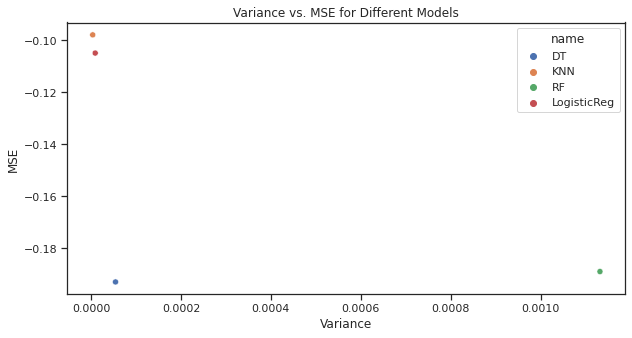

In [178]:
show_metrics(metric_df,"Variance","MSE")

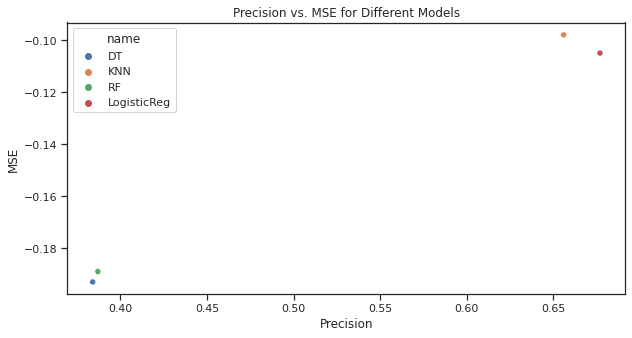

In [177]:
show_metrics(metric_df,"Precision","MSE")

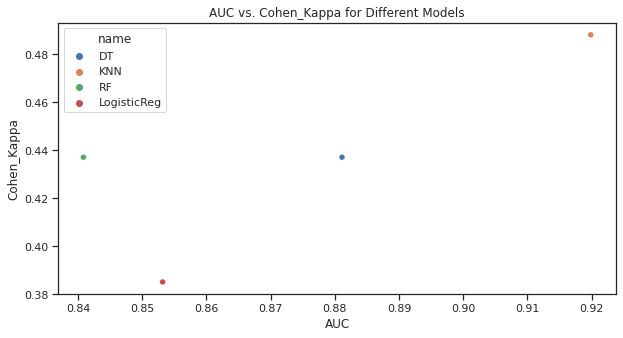

In [179]:
show_metrics(metric_df,"AUC","Cohen_Kappa")

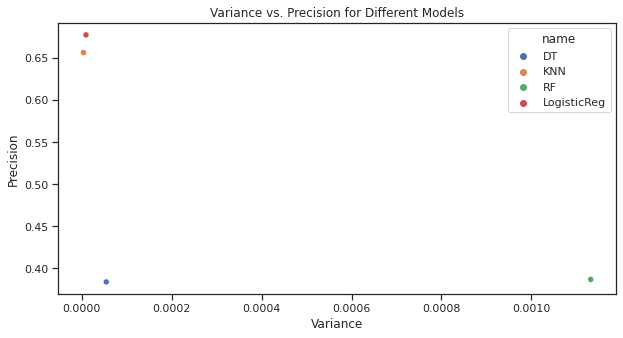

In [181]:
show_metrics(metric_df,"Variance","Precision")

After designing and training the different models, it is necessary to choose the best model to apply. This choice depends on different factors: if we want to minimise the error and have the lowest variance in the prediction of our values, KNN seems to be the right choice. In the case where our aim is to maximise our accuracy in predicting who will accept, logistic regression seems to be a better choice.
The choice will be mainly between logistic regression and KNN.

The optimal parameters are : 
- KNN : {'weights': 'uniform', 'n_neighbors': 300, 'metric': 'minkowski', 'algorithm': 'ball_tree'}
- Logistic Regression : {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'intercept_scaling': 1, 'fit_intercept': False, 'class_weight': None, 'C': 0.0001}


It seems more relevant to take the logistic regression. Thanks to the data analysis done previously, it would be necessary to rebalance the data to give more weight to certain data (like duration or nr.employed).
